# PARTIE INTEL IMAGES


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# --- 1. Définition des chemins de données ---
base_dir = "Intel_Images/Intel_Images"  # Chemin vers le dossier parent des données
train_dir = "Intel_Images/Intel_Images/seg_train/seg_train"  # Dossier pour l'entraînement
test_dir = "Intel_Images/Intel_Images/seg_test/seg_test"   # Dossier pour le test
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [3]:
# --- 2. Paramètres ---
image_size = (150, 150) # Taille des images
batch_size = 32        # Nombre d'images par lot
epochs = 10           # Nombre d'itérations d'entraînement

In [4]:
# --- 3. Préparation des générateurs d'images ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# --- 4. Chargement des données avec flow_from_directory ---
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Classification multiclasse
    classes=classes
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical', # Classification multiclasse
    classes=classes
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
# --- 5. Construction du modèle CNN ---
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))  # Softmax pour la sortie multiclasse

c:\Users\etien\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# --- 6. Compilation du modèle ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# --- 7. Entraînement du modèle ---
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=epochs,
    validation_data=test_set,
    validation_steps=len(test_set)
)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 113s 257ms/step - accuracy: 0.6475 - loss: 0.9443 - val_accuracy: 0.7423 - val_loss: 0.7034
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 102s 233ms/step - accuracy: 0.7050 - loss: 0.7957 - val_accuracy: 0.7667 - val_loss: 0.6554
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 103s 235ms/step - accuracy: 0.7480 - loss: 0.6939 - val_accuracy: 0.7707 - val_loss: 0.6055
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 103s 235ms/step - accuracy: 0.7781 - loss: 0.6314 - val_accuracy: 0.7847 - val_loss: 0.5633
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 109s 249ms/step - accuracy: 0.7932 - loss: 0.5942 - val_accuracy: 0.8253 - val_loss: 0.4925
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 103s 234ms/step - accuracy: 0.8116 - loss: 0.5241 - val_accuracy: 0.8337 - val_loss: 0.4656
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 103s 233ms/step - accuracy: 0.8193 - loss: 0.5078 - val_accuracy: 0.8490 - val_loss: 0.4344
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 102s 232ms/step - accuracy: 0.8249 -

In [10]:
# --- 8. Évaluation du modèle ---
loss, accuracy = model.evaluate(test_set)
print(f"Perte sur le jeu de test : {loss:.4f}")
print(f"Précision sur le jeu de test : {accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8524 - loss: 0.4085
Perte sur le jeu de test : 0.4163
Précision sur le jeu de test : 0.8550


In [11]:
import random

def predict_image(image_path):
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = classes[predicted_class_index]
    probability = prediction[0][predicted_class_index]
    print(f"L'image {image_path} est classifiée comme : {predicted_class_name} (probabilité : {probability:.2f})")

def apply_predict_to_random_images(folder_path, num_images=10):
    # Lister tous les fichiers dans le dossier
    all_files = os.listdir(folder_path)
    
    # Filtrer pour ne garder que les fichiers d'image (par exemple, .jpg, .png)
    image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]
    
    # Sélectionner 10 fichiers aléatoirement
    selected_files = random.sample(image_files, num_images)
    
    # Appliquer la fonction predict_image à chaque fichier sélectionné
    for image_file in selected_files:
        image_path = os.path.join(folder_path, image_file)
        predict_image(image_path)

# Utilisation de la fonction
apply_predict_to_random_images('Intel_Images/Intel_Images/seg_pred/seg_pred')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\20295.jpg est classifiée comme : buildings (probabilité : 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\12971.jpg est classifiée comme : sea (probabilité : 0.95)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\2620.jpg est classifiée comme : forest (probabilité : 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\18762.jpg est classifiée comme : glacier (probabilité : 0.57)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\7817.jpg est classifiée comme : buildings (probabilité : 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\388.jpg est classifiée comme : mountain (probabilité : 0.57)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
L'image Intel_Images/Intel_Images/seg_pred/seg_pred\13

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━

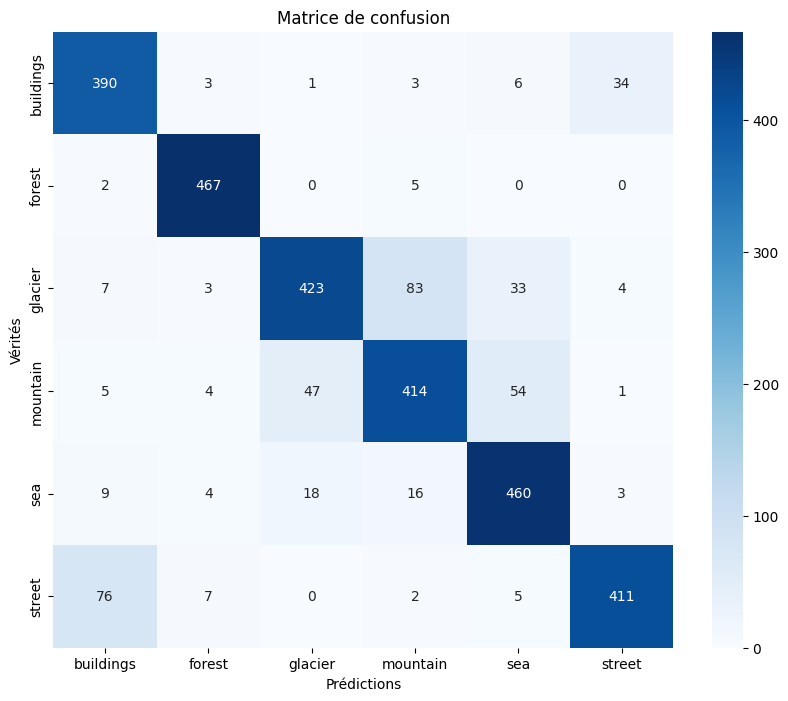

In [12]:
# --- 12. Matrice de confusion ---
y_pred = []
y_true = []
for images, labels in test_set:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels, axis=1))
    if len(y_true) >= test_set.samples:
        break

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()

In [13]:
# --- 13. Rapport de classification ---
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

   buildings       0.80      0.89      0.84       437
      forest       0.96      0.99      0.97       474
     glacier       0.87      0.76      0.81       553
    mountain       0.79      0.79      0.79       525
         sea       0.82      0.90      0.86       510
      street       0.91      0.82      0.86       501

    accuracy                           0.85      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.85      0.85      3000



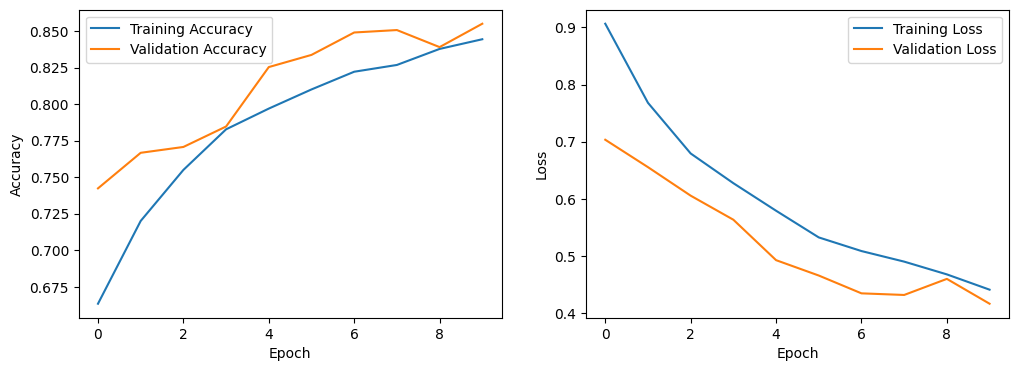

In [14]:
# --- 15. Courbes d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

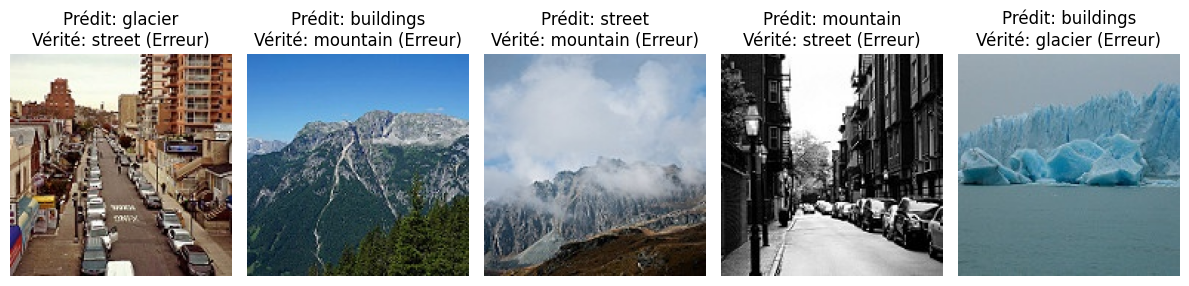

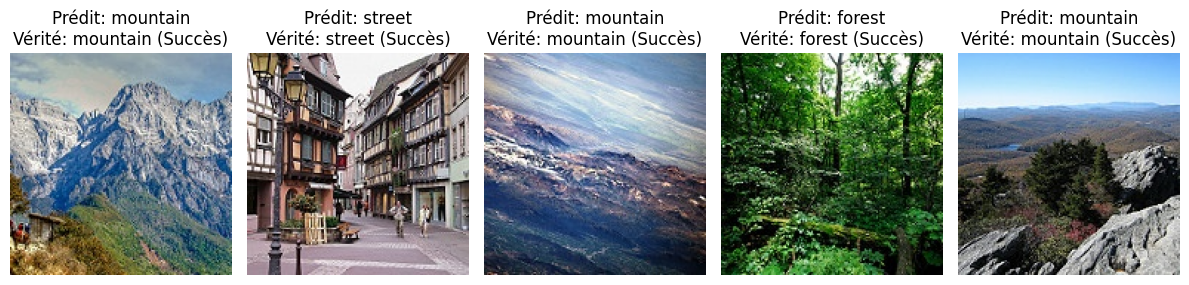

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2  # Utilisation de OpenCV

# Définir le chemin principal vers le dossier de test
dossier_test = "Intel_Images/Intel_Images/seg_test/seg_test"

# Définir les classes
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Fonction pour charger les chemins des images et leurs étiquettes
def charger_images(dossier_principal, classes):
    chemins_images = []
    etiquettes = []
    for classe in classes:
        dossier_classe = os.path.join(dossier_principal, classe)
        if os.path.exists(dossier_classe):  # Vérifier si le dossier existe
            for nom_fichier in os.listdir(dossier_classe):
                if nom_fichier.endswith(('.jpg', '.jpeg', '.png')):
                    chemin_image = os.path.join(dossier_classe, nom_fichier)
                    chemins_images.append(chemin_image)
                    etiquettes.append(classes.index(classe))  # Associer l'indice de la classe
        else:
            print(f"Le dossier {dossier_classe} n'existe pas.")
    return chemins_images, etiquettes

# Charger les images et les étiquettes
chemins_images, etiquettes_vraies = charger_images(dossier_test, classes)

# Mélanger les données
indices = list(range(len(chemins_images)))
random.shuffle(indices)

chemins_images = [chemins_images[i] for i in indices]
etiquettes_vraies = [etiquettes_vraies[i] for i in indices]

# Convertir les prédictions et les vraies étiquettes en tableaux NumPy
y_true = np.array(etiquettes_vraies)

# ****************************************************************************
# **CRUCIAL : Assurez-vous que y_pred est défini AVANT ce point!**
# y_pred doit être un tableau NumPy de taille (len(chemins_images),)
# contenant les INDICES des classes prédites (0 à 5) pour chaque image.
# L'ordre dans y_pred doit correspondre à l'ordre des images dans
# chemins_images APRÈS le mélange.
# ****************************************************************************

# Exemple : (REMPLACEZ CECI PAR VOTRE VRAI CODE DE PRÉDICTION)
# Supposons que vous avez une fonction qui prend un chemin d'image et renvoie une prédiction :
def predict_image(chemin_image):
    # Ici, vous mettriez le code pour charger l'image, la passer à votre modèle,
    # et obtenir une prédiction.
    # Pour l'exemple, on va juste renvoyer une classe aléatoire :
    return random.randint(0, len(classes) - 1)

# Créer y_pred en utilisant la fonction de prédiction et en s'assurant
# que l'ordre correspond à celui de chemins_images APRÈS le mélange :
y_pred = np.array([predict_image(chemin_image) for chemin_image in chemins_images])
# ****************************************************************************


# Trouver les erreurs et les succès
erreurs = np.where(y_pred != y_true)[0]
succes = np.where(y_pred == y_true)[0]  # Indices des prédictions réussies

# Fonction pour afficher les images (erreurs ou succès)
def afficher_images(indices, type_affichage="erreur", nombre_images=5):
    nombre_a_afficher = min(nombre_images, len(indices))
    plt.figure(figsize=(12, 6))
    for i in range(nombre_a_afficher):
        index = indices[i]
        chemin_image = chemins_images[index]

        try:
            # Charger l'image avec OpenCV
            image = cv2.imread(chemin_image)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            plt.subplot(1, nombre_a_afficher, i + 1)
            plt.imshow(image)
            plt.axis('off')

            # Afficher le titre
            predicted_class_index = y_pred[index]
            true_class_index = y_true[index]  # Récupérer l'indice de la vraie classe

            if type_affichage == "erreur":
                plt.title(f"Prédit: {classes[predicted_class_index]}\nVérité: {classes[true_class_index]} (Erreur)")
            else:
                plt.title(f"Prédit: {classes[predicted_class_index]}\nVérité: {classes[true_class_index]} (Succès)")


        except Exception as e:
            print(f"Erreur lors de l'affichage de l'image {chemin_image}: {e}")
            continue

    plt.tight_layout()
    plt.show()


# Afficher quelques erreurs
afficher_images(erreurs, type_affichage="erreur")

# Afficher quelques succès
afficher_images(succes, type_affichage="succes")